<a href="https://colab.research.google.com/github/cleo-bs/MVP_Engenharia-de-Dados/blob/main/MVP_%7C_Engenharia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP | Cléo Berni | Sprint: Engenharia de Dados

## Objetivo

A base de dados escolhidas é um dataset público referente a diferentes Marketplaces do Brasil disponibilizados pela Olist. Os dados estão disponíveis na plataforma da Kaggle "Brazilian E-Commerce Public Dataset by Olist".

O objetivo da análise é determinar qual o Top 3 estados que melhor performaram no ano de 2017 e algumas de suas principais características.

* Qual são os 3 estados que mais venderam em 2017? *Considerando a premissa de que o Estado do cliente é o Estado que faturou a venda.*
* Qual as principais características dos pedidos em cada estado? Média do Custo do Envio, Média da quantidade de items por pedido e Categorias.


## Modelagem

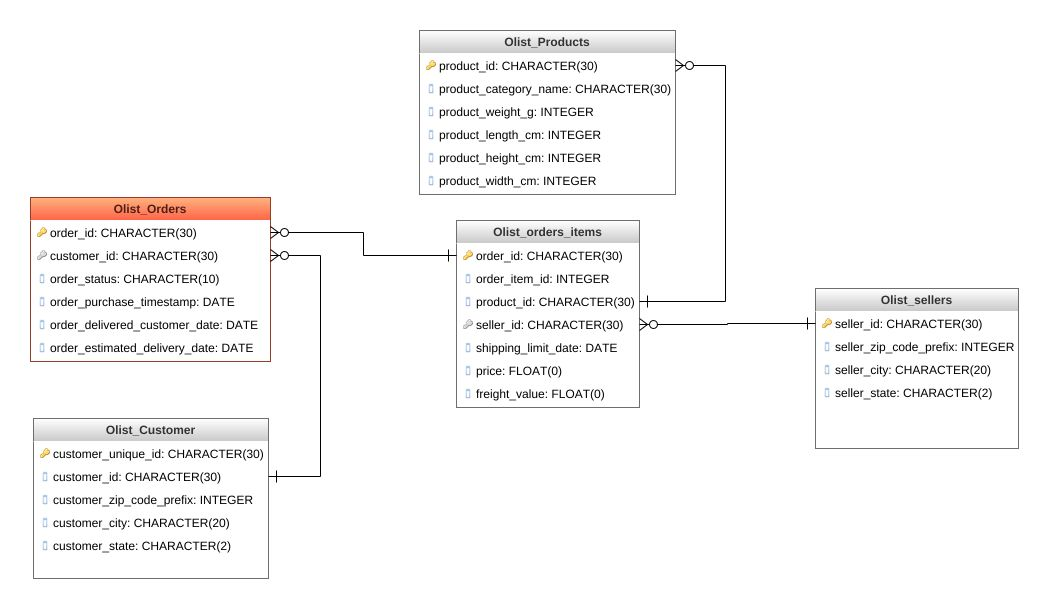

* Os dados do projeto foram modelados seguindo um esquema do tipo "snowflake". A tabela "Olist_Order" é a tabela fato que reune as informações das vendas da plataforma Olist. No esquema, a tabela fato está relacionada a outras tabelas como "Olist_Customer" e "Olist_orders_items". Essa última está relacionada a outras tabelas: "Olist_Products" e "Olist_Sellers" que completam a dimensão da tabela fato.
* A tabela fato está diretamente relacionada a tabela "Olist_Customer" que mostra as informações dos clientes como ID e a sua localização. Já a tabela "Olist_Orders_items" traz informação dos items que foram enviados no pedido, os fornecedores, o valor do pedido e o valor do frete.
* A tabela "Olist_Products" informa a descrição do produto como a sua categoria, comprimento, altura, largura e peso.
* Cada tabela possui a sua própria PK (ilustradas com a chave dourada) e as linhas sinalizam a relação entre as dimensões.

## Catálogo de Dados

#### Tabela Olist_Order

* **order_id**: Chave de identificação do pedido | *Total de 99.441 pedidos*
* **customer_id**: Chave de identificação do cliente | *Total de 99.441 clientes*
* **order_status**: Categoria do status do cliente:

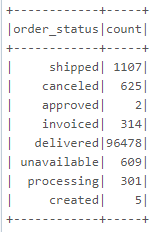

* **order_purchase_timestamp**: Data que o pedido foi feito | *Data mais recente: 17/10/2018 | Data mais antiga: 04/09/2016*
* **order_delivered_customer_date**: Data que o pedido foi entregue | *Data mais recente: 17/10/2018 | Data mais antiga: 11/10/2016*
* **order_estimated_delivery_date**: Data estimada de entrega | *Data mais recente: 12/10/2018 | Data mais antiga: 30/09/2016*

### Tabela Olist_Customer

* **customer_id**: Chave de identificação do cliente | *Total de 99.441 clientes*
* **customer_unique_id**: Chave de identificação única do cliente | *Total de 96.096 clientes diferentes*
* **customer_zip_code_prefix**: Prefixo do CEP do cliente | *Total de 14.994 CEPs diferentes*
* **customer_city**: Cidade do Cliente | *Total de 4.119 cidades diferentes*
* **customer_state**: Estado do Cliente:

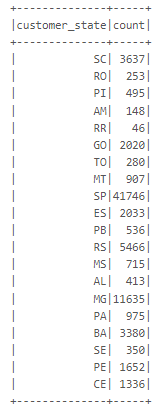

### Tabela Olist_Order_Items

* **order_id**: Chave de identificação do pedido | *Total de 99.441 pedidos*
* **order_item_id**: Número de itens no pedido:

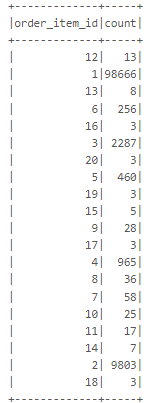

* **product_id**: Código de identificação do produto | *Total de 32.951 produtos diferentes*
* **seller_id**: Código de identificação do revendedor | *Total de 3.095 revendedores diferentes*
* **shipping_limit_date**: Data máxima de envio do pedido | *Data mais recente: 09/04/2020 | Data mais antiga: 19/09/2016*
* **price**: Preço do pedido | *Valor mínimo: 0,85 reais | Valor máximo: 6.735 reais*
* **freight_value**: Preço do frete | *Valor mínimo: 0 reais | Valor máximo: 409,7 reais*

### Tabela Olist_Products

* **product_id**: Código de identificação do produto | *Total de 32.951 produtos diferentes*
* **product_category_name**: Categoria do produto:

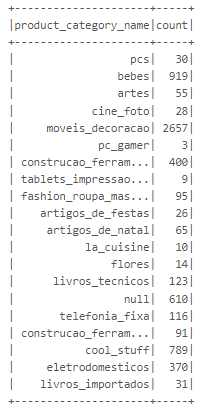


* **product_weight_g**: Peso do item | *Valor mínimo: 0g | Valor máximo: 40425g*
* **product_length_cm**: Comprimento do item | *Valor mínimo: 7cm | Valor máximo: 105cm*
* **product_height_cm**: Altura do item | *Valor mínimo: 2cm | Valor máximo: 105cm*
* **product_width_cm**: Largura do item | *Valor mínimo: 6cm | Valor máximo: 118cm*

### Tabela Olist_Sellers

* **seller_id**: Código de identificação do revendedor | *Total de 3.095 revendedores diferentes*
* **seller_zip_code_prefix**: Prefixo do CEP do revendedor | *Total de 2.246 CEPs diferentes*
* **seller_city**: Cidade do revendedor | *Total de 611 cidades diferentes*
* **seller_state**: Estado do revendedor:

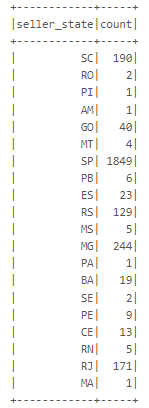

## Carga - Databricks

### Criação dos Database

Foram criadas 3 camadas de processamento de dados dentro do ambiente databricks conforme a arquitetura 'medallion'. Um database 'bronze' que contém os dados brutos, um database 'silver' que possui um tratamento inicial e um database 'gold' com os dados já prontos para serem utilizados a nível de negócio.

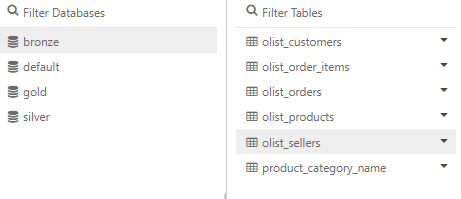

* A camada gold desse projeto contém o dataset "olist_delivered_orders_2017" já filtrado pelos pedidos que foram enviados (status='delivered') e do ano de 2017 (order_purchase_timestamp = 2017)

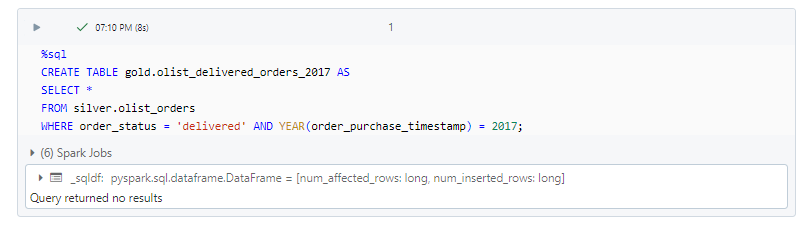

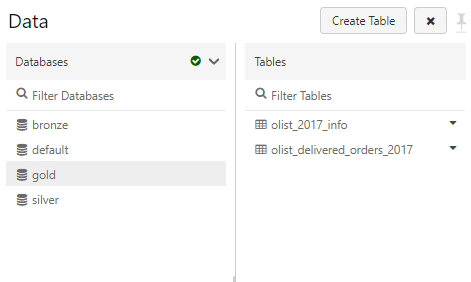

### Importação de Bibliotecas

Cada dataset foi importado manualmente no ambiente do Databricks seguindo o código abaixo:

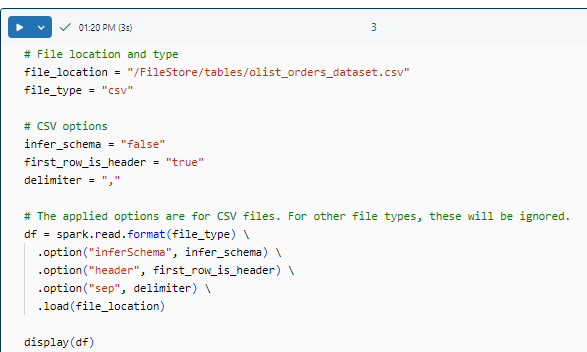

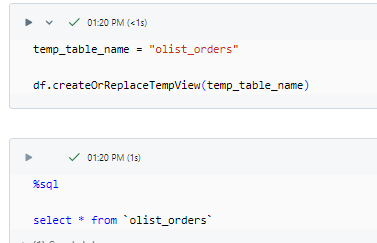

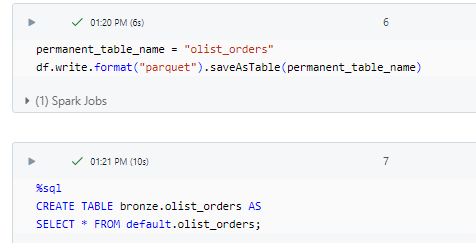

## Pipeline

Cada tabela teve o seu próprio modelo de pipeline criado. Em geral, os dados estavam bem trabalhados, mas havia um erro principalmente em relação ao tipo de dado. Além disso, nesse momento também houve a remoção de colunas dispensáveis, remoção de valores nulos e duplicados em cada dataset.

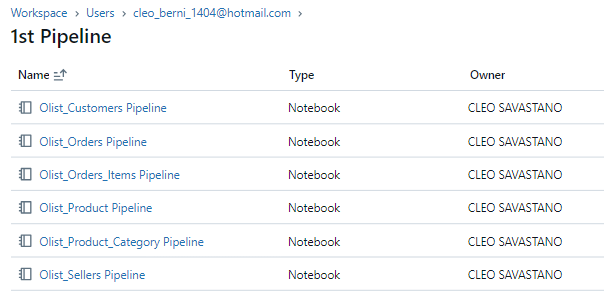

Abaixo segue o exemplo de pipeline criado para a tabela "Olist_Customers"

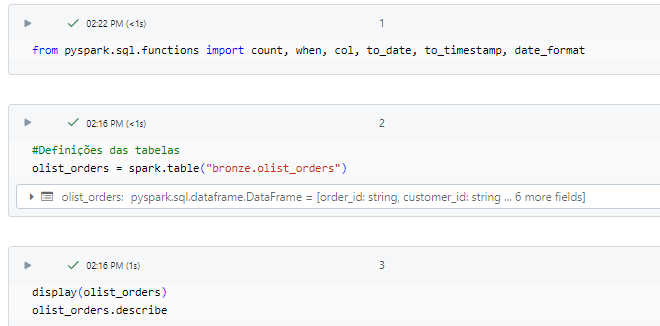

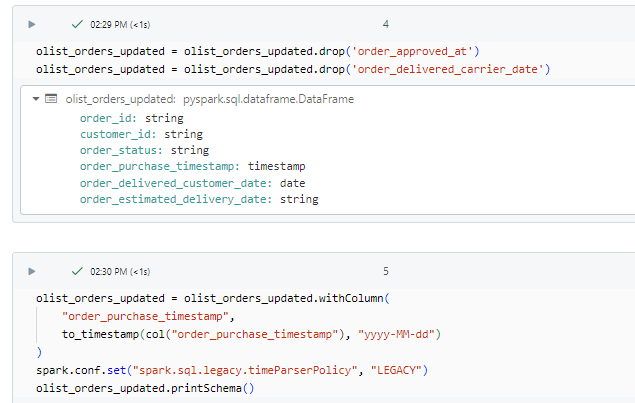

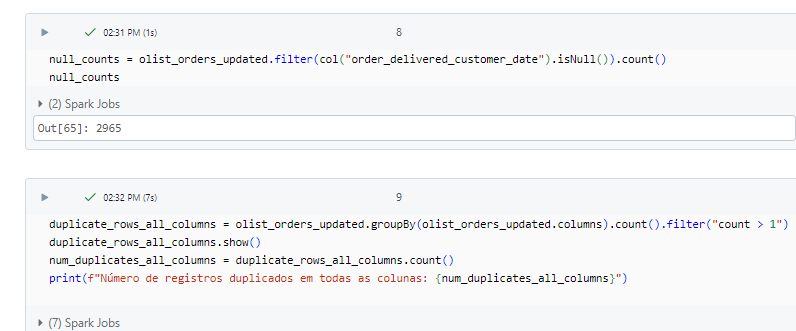

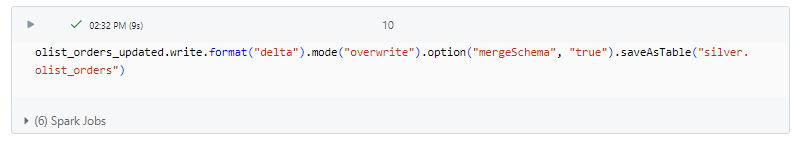

A seguir segue 2 exemplos das alterações feitas na tabela "Olist_Orders" e "Olist_Customers". Inicialmente, os dados não tratados estavam na camada  bronze e após esse tratamento inicial foram adicionadas na camada silver

* Exemplo - Tabela "Olist_Customer"

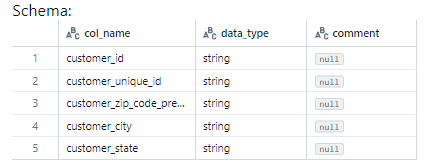

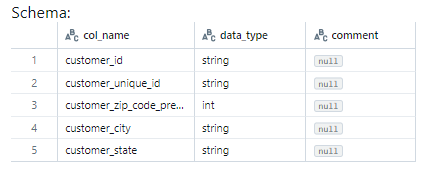

* Exemplo - Tabela "Olist_Orders"

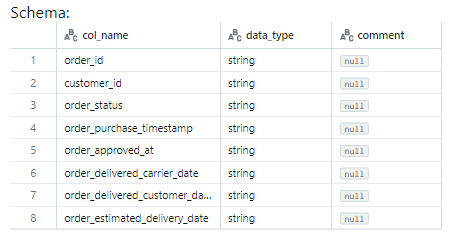

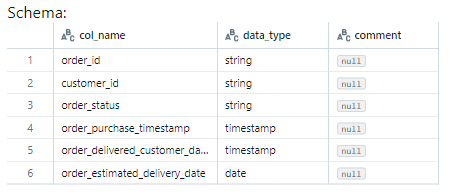

## Análise dos Dados

A partir da tabela "olist_delivered_orders_2017" da camada gold é possivel fazer alguns *Left Joins* e criar novas tabelas para ajudar a responder as perguntas do projeto. Abaixo está a tabela "olist_2017_info" que faz um join com o estado dos clientes, o preço e frete do pedido, a categoria do item no pedido e o estado dos revendedores.

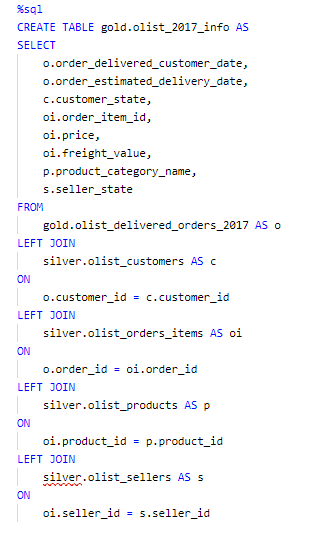

O código abaixo mostra que os estados que mais venderam, considerando a soma das vendas, foram respectivamente:

* Estados que mais venderam: SP, RJ e MG
* A média do custo do envio foi respectivamente: $ 14.95, $ 20.00 e $ 19.48
* A média de itens por pedido é de: 1.20, 1.19, 1.19

Podemos notar que o Estado que mais vendeu, SP, vendeu 143% a mais que o RJ, segundo colocado.

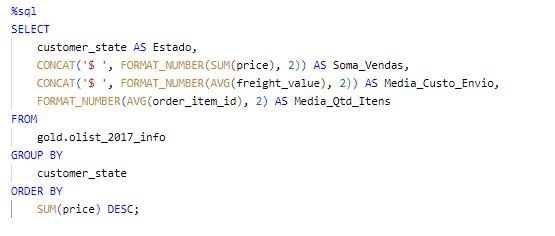

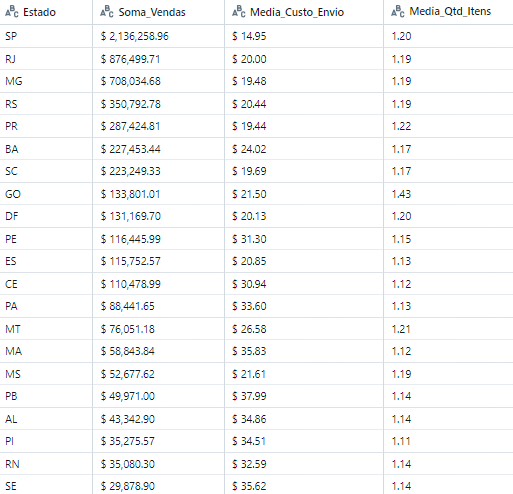

* O código abaixo mostra quais o top 3 categorias que mais venderam para cada estado do Top 3. Em todos, a categoria que mais vendeu era de cama,mesa e banho.

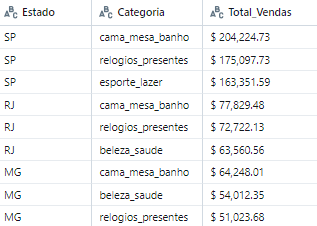

### Autoavaliação

Eu estou satisfeita com os aprendizados obtidos durante a execução desse projeto. Ele me ajudou a entender melhor a teoria apresentada no curso. Por isso, acabei tomando mais tempo no desenvolvimento da modelagem e de carga dos datasets no Databricks. Consegui aprender a mexer no sistema e entendi melhor a aplicação do SQL. No entando, gostaria de ter tido mais tempo para focar na análise dos resultados, mas tive alguns problemas pessoais que atrapalharam.